In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
sns.set_palette("husl")
sns.set_style('whitegrid')

path = "Salary_Data.csv"

In [2]:
data = pd.read_csv(path)
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [4]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

## **Brakujące Dane**
Jako że brake danych w zbiorze jest niewiele, pozbycie się ich nie pogorszy jakości modelu.

In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


In [7]:
data.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [8]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [9]:
data["Gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [10]:
data["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

-----

## **Przygotowanie danych do analizy**
Widać że dane są niejednorode, tj pokazują te same rzeczy na kilka sposobów, takie dane mogą pogorszyć jakość modelu, dlatego trzeba je przekształcić.

In [11]:
replace_dict = {
    "Bachelor's" : "Bachelor's",
    "Master's" : "Master's",
    'PhD' : 'PhD',
    "Bachelor's Degree" : "Bachelor's",
    "Master's Degree" : "Master's",
    'High School' : 'High School',
    'phD' : 'PhD',
}

data["Education Level"] = data["Education Level"].map(replace_dict)
data["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

In [12]:
data["Job Title"].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [13]:
data["Job Title"].nunique()

191

In [14]:
ordered_data = data.groupby("Job Title")["Salary"].median().sort_values(ascending=False)
ordered_data.head(10)

Job Title
CEO                            250000.0
Chief Technology Officer       250000.0
Chief Data Officer             220000.0
Director of Data Science       210000.0
VP of Finance                  200000.0
Director                       200000.0
Marketing Director             190000.0
Operations Director            190000.0
VP of Operations               190000.0
Director of Human Resources    187500.0
Name: Salary, dtype: float64

-----
## **Analiza danych**

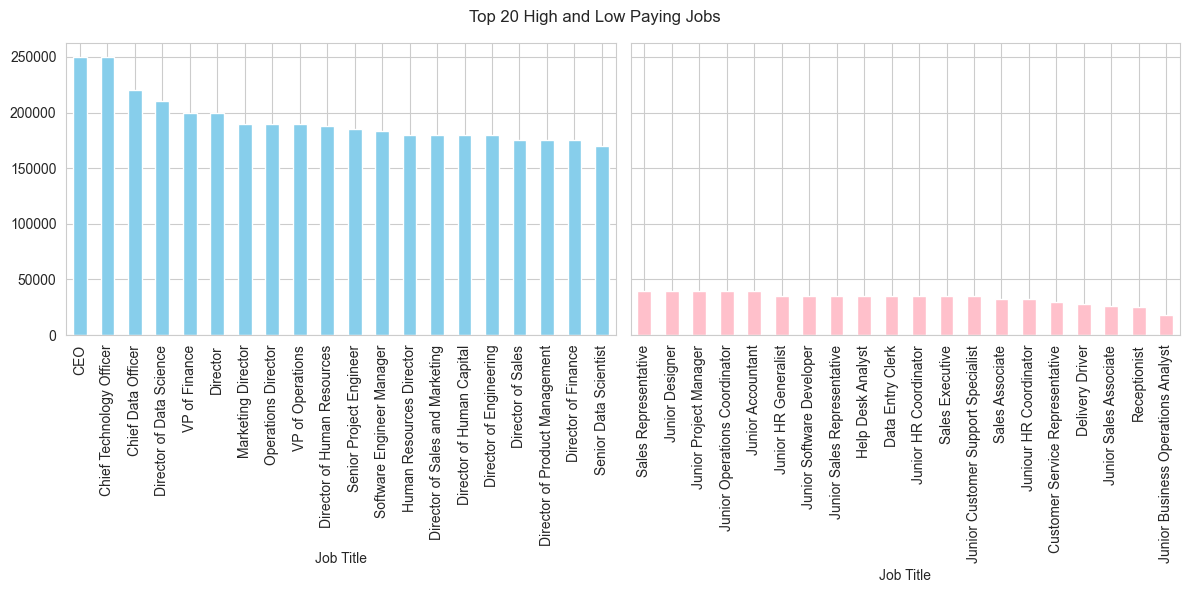

In [15]:
high_pay_data = ordered_data[:20]
low_pay_data = ordered_data[-20:]

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
high_pay_data.plot(kind="bar", ax=ax[0], color="skyblue")
low_pay_data.plot(kind="bar", ax=ax[1], color="pink")
plt.suptitle("Top 20 High and Low Paying Jobs")
plt.tight_layout()


## **Uproszczenie danych**
Upraszczamy dane, tek żeby następnę przekształcenia były lepiej widoczne. ten krok nie pojawił by się w rzeczywistym projekcie.

In [16]:
# Get the 5 most common job titles
top_5_jobs = data['Job Title'].value_counts().index[:5]
top_5_jobs

Index(['Software Engineer', 'Data Scientist', 'Software Engineer Manager',
       'Data Analyst', 'Senior Project Engineer'],
      dtype='object', name='Job Title')

In [17]:

data = data[data['Job Title'].isin(top_5_jobs)]
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
32,29.0,Male,Master's,Data Scientist,3.0,75000.0
81,41.0,Female,Master's,Data Analyst,13.0,80000.0
375,31.0,Male,Master's,Data Scientist,6.0,160000.0
...,...,...,...,...,...,...
6230,32.0,Female,PhD,Data Scientist,9.0,145000.0
6233,27.0,Male,Bachelor's,Software Engineer,3.0,80000.0
6244,32.0,Female,PhD,Data Scientist,9.0,145000.0
6247,27.0,Male,Bachelor's,Software Engineer,3.0,80000.0


<Axes: ylabel='count'>

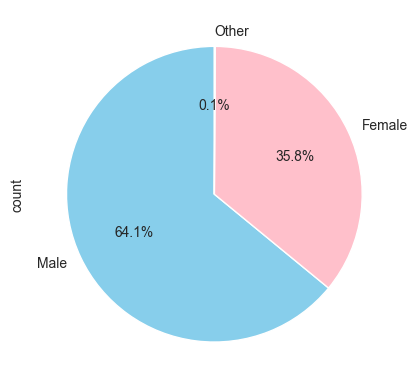

In [18]:
data["Gender"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["skyblue", "pink", "lightgreen"])

<Axes: xlabel='Education Level'>

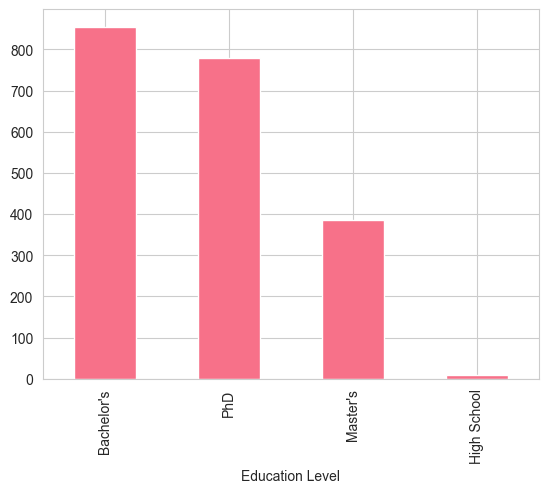

In [19]:
data["Education Level"].value_counts().plot(kind="bar")

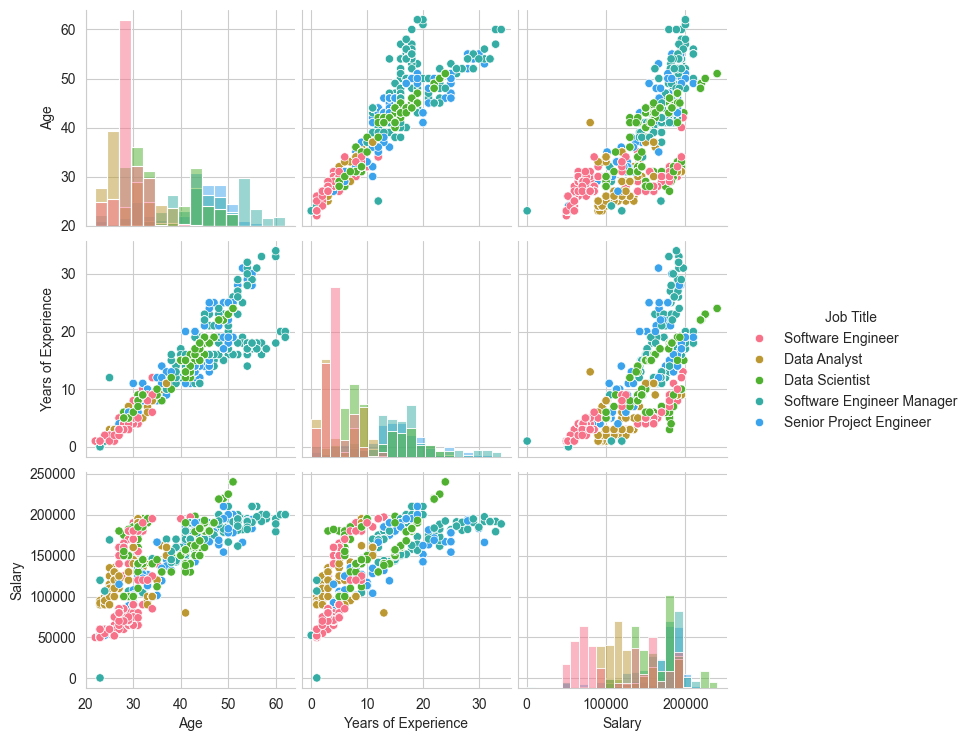

In [20]:
sns.pairplot(data, hue='Job Title', diag_kind='hist')


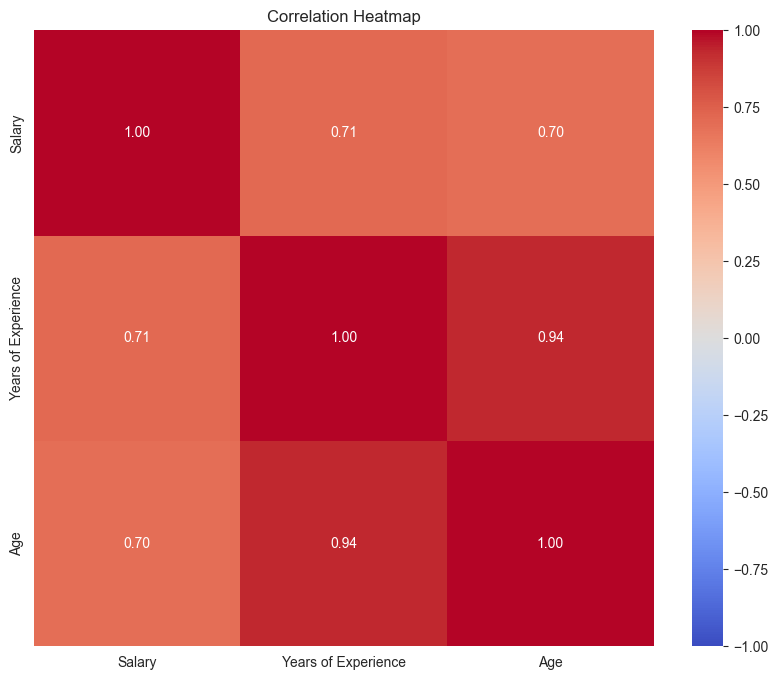

In [21]:
numeric_cols = [
    "Salary",
    "Years of Experience",
    "Age"
    ]

corr = data[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Nasze dane są bardzo skorelowane.

--------

## **Podział zbioru danych na atrubuty i etykiety**


In [22]:

X = data.drop("Salary", axis=1)
y = data["Salary"]

In [23]:
X.head()

,Age,Gender,Education Level,Job Title,Years of Experience
0,32.0,Male,Bachelor's,Software Engineer,5.0
1,28.0,Female,Master's,Data Analyst,3.0
32,29.0,Male,Master's,Data Scientist,3.0
81,41.0,Female,Master's,Data Analyst,13.0
375,31.0,Male,Master's,Data Scientist,6.0


In [24]:
y.head()

0       90000.0
1       65000.0
32      75000.0
81      80000.0
375    160000.0
Name: Salary, dtype: float64

-----

## **Preprocessing**
Chcemy przekształcić dane tak aby były w formie zrozumiałej dla modelu.
1. Standaryzacja danych numerycznych (użyjemy wbudowanej klasy StandardScaler z sci-kit learn),
2. Encoding danych kategorycznych (użyjemy wbudowanej klasy OneHotEncoder z sci-kit learn).


### Standaryzacja

In [25]:
from sklearn.preprocessing import StandardScaler


X_copy = X.copy()

scaler = StandardScaler()
X_copy[["Age", "Years of Experience"]] = scaler.fit_transform(X_copy[["Age", "Years of Experience"]])
X_copy.head()

,Age,Gender,Education Level,Job Title,Years of Experience
0,-0.384511,Male,Bachelor's,Software Engineer,-0.704863
1,-0.814739,Female,Master's,Data Analyst,-1.002048
32,-0.707182,Male,Master's,Data Scientist,-1.002048
81,0.583502,Female,Master's,Data Analyst,0.483879
375,-0.492068,Male,Master's,Data Scientist,-0.556270


### Enkodowanie danych kategorycznych porządkowych

In [26]:
X_copy["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

In [27]:
dict_edu = {
    "High School" : 0,
    "Bachelor's" : 1,
    "Master's" : 2,
    "PhD" : 3
}

X_copy["Education Level"] = X_copy["Education Level"].map(dict_edu)
X_copy.head()

,Age,Gender,Education Level,Job Title,Years of Experience
0,-0.384511,Male,1,Software Engineer,-0.704863
1,-0.814739,Female,2,Data Analyst,-1.002048
32,-0.707182,Male,2,Data Scientist,-1.002048
81,0.583502,Female,2,Data Analyst,0.483879
375,-0.492068,Male,2,Data Scientist,-0.556270


### One Hot Encoding


In [28]:
job = X_copy["Job Title"]
job

0       Software Engineer
1            Data Analyst
32         Data Scientist
81           Data Analyst
375        Data Scientist
              ...        
6230       Data Scientist
6233    Software Engineer
6244       Data Scientist
6247    Software Engineer
6258       Data Scientist
Name: Job Title, Length: 2028, dtype: object

In [29]:
job_one_hot = pd.get_dummies(job, prefix="Job Title").astype(float)
job_one_hot

,Job Title_Data Analyst,Job Title_Data Scientist,Job Title_Senior Project Engineer,Job Title_Software Engineer,Job Title_Software Engineer Manager
0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0
32,0.0,1.0,0.0,0.0,0.0
81,1.0,0.0,0.0,0.0,0.0
375,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
6230,0.0,1.0,0.0,0.0,0.0
6233,0.0,0.0,0.0,1.0,0.0
6244,0.0,1.0,0.0,0.0,0.0
6247,0.0,0.0,0.0,1.0,0.0


In [30]:
X_cat = X_copy[["Gender", "Job Title"]]
X_cat

,Gender,Job Title
0,Male,Software Engineer
1,Female,Data Analyst
32,Male,Data Scientist
81,Female,Data Analyst
375,Male,Data Scientist
...,...,...
6230,Female,Data Scientist
6233,Male,Software Engineer
6244,Female,Data Scientist
6247,Male,Software Engineer


In [31]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse_output=False)
X_enc = encoder.fit_transform(X_cat)
X_enc

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [32]:
X_enc = pd.DataFrame(X_enc, columns=encoder.get_feature_names_out(X_cat.columns))
X_enc.head()

,Gender_Female,Gender_Male,Gender_Other,Job Title_Data Analyst,Job Title_Data Scientist,Job Title_Senior Project Engineer,Job Title_Software Engineer,Job Title_Software Engineer Manager
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


-----

## **Pipeline**
Tworzymy pipeline, który pozwoli nam na automatyzację przekształceń danych.

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder


numeric_cols = ["Age", "Years of Experience"]
one_hot_cols = ["Gender", "Job Title"]
cat_ord_cols = ["Education Level"]

onehot_encoder = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()
ordinal_encoder = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_cols),
        ('cat', onehot_encoder, one_hot_cols),
        ('ord', ordinal_encoder, cat_ord_cols)
    ], 
    remainder="passthrough"
)

In [34]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['Age', 'Years of Experience']),
                                ('cat', OneHotEncoder(sparse_output=False),
                                 ['Gender', 'Job Title']),
                                ('ord', OrdinalEncoder(), ['Education Level'])])

----
## **Podział danych na zbiór uczący i testowy**


In [35]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape, X_test.shape 

((1622, 5), (406, 5))

In [37]:
y_train.shape, y_test.shape

((1622,), (406,))

In [38]:
X_train.head()

,Age,Gender,Education Level,Job Title,Years of Experience
3777,46.0,Male,PhD,Data Scientist,18.0
2172,43.0,Female,PhD,Senior Project Engineer,14.0
1309,56.0,Male,PhD,Software Engineer Manager,17.0
1977,39.0,Female,Master's,Software Engineer Manager,12.0
4256,30.0,Male,Bachelor's,Software Engineer,5.0


In [39]:
y_train.head()

3777    180000.0
2172    190000.0
1309    195000.0
1977    160000.0
4256     75000.0
Name: Salary, dtype: float64

In [40]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
cols = preprocessor.get_feature_names_out()

X_train_preprocessed.shape, X_test_preprocessed.shape

((1622, 11), (406, 11))

In [41]:
X_train_preprocessed

array([[1.10382443, 1.21020713, 0.        , ..., 0.        , 0.        ,
        3.        ],
       [0.78420469, 0.62095205, 1.        , ..., 0.        , 0.        ,
        3.        ],
       [2.16922355, 1.06289336, 0.        , ..., 0.        , 1.        ,
        3.        ],
       ...,
       [1.42344416, 0.76826582, 0.        , ..., 0.        , 1.        ,
        3.        ],
       [0.99728452, 1.65214843, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.10382443, 0.91557959, 0.        , ..., 0.        , 1.        ,
        3.        ]])

In [47]:
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=cols)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=cols)

X_train_preprocessed_df.head()

,num__Age,num__Years of Experience,cat__Gender_Female,cat__Gender_Male,cat__Gender_Other,cat__Job Title_Data Analyst,cat__Job Title_Data Scientist,cat__Job Title_Senior Project Engineer,cat__Job Title_Software Engineer,cat__Job Title_Software Engineer Manager,ord__Education Level
0,1.103824,1.210207,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
1,0.784205,0.620952,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
2,2.169224,1.062893,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
3,0.358045,0.326325,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
4,-0.600814,-0.704872,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


-----
# **Modelowanie**

In [48]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model

LinearRegression()

In [49]:
model.fit(X_train_preprocessed, y_train)

LinearRegression()

In [50]:
from sklearn.metrics import mean_squared_error


def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

y_train_pred = model.predict(X_train_preprocessed)
y_test_pred = model.predict(X_test_preprocessed)

train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

Train RMSE: 29097.75
Test RMSE: 30031.28


In [51]:
test_guy = X_test_preprocessed_df.iloc[1]
test_guy

num__Age                                    0.358045
num__Years of Experience                    0.326325
cat__Gender_Female                          1.000000
cat__Gender_Male                            0.000000
cat__Gender_Other                           0.000000
cat__Job Title_Data Analyst                 0.000000
cat__Job Title_Data Scientist               0.000000
cat__Job Title_Senior Project Engineer      0.000000
cat__Job Title_Software Engineer            0.000000
cat__Job Title_Software Engineer Manager    1.000000
ord__Education Level                        2.000000
Name: 1, dtype: float64

In [52]:
test_guys_pay = y_test.iloc[1]
test_guys_pay

160000.0

In [53]:
test_guy_pred = model.predict([test_guy])
test_guy_pred

array([150949.08188718])

#### Całkiem trafny ten model

Po wytrenowaniu modelu, mamy dostęp do jego wartości parametrów.

In [54]:
coef = model.coef_
intercept = model.intercept_

coef, intercept

(array([ 16897.2101975 ,  15932.61502745,  19128.27707994,  21630.41566591,
        -40758.69274585,   -828.26833991,  18450.63751258,  -1504.15289906,
        -12214.9628731 ,  -3903.2534005 ,  -2849.8278948 ]),
 130174.5487182662)

In [55]:
test_guy_pred = coef.dot(test_guy) + intercept
test_guy_pred

150949.08188717632

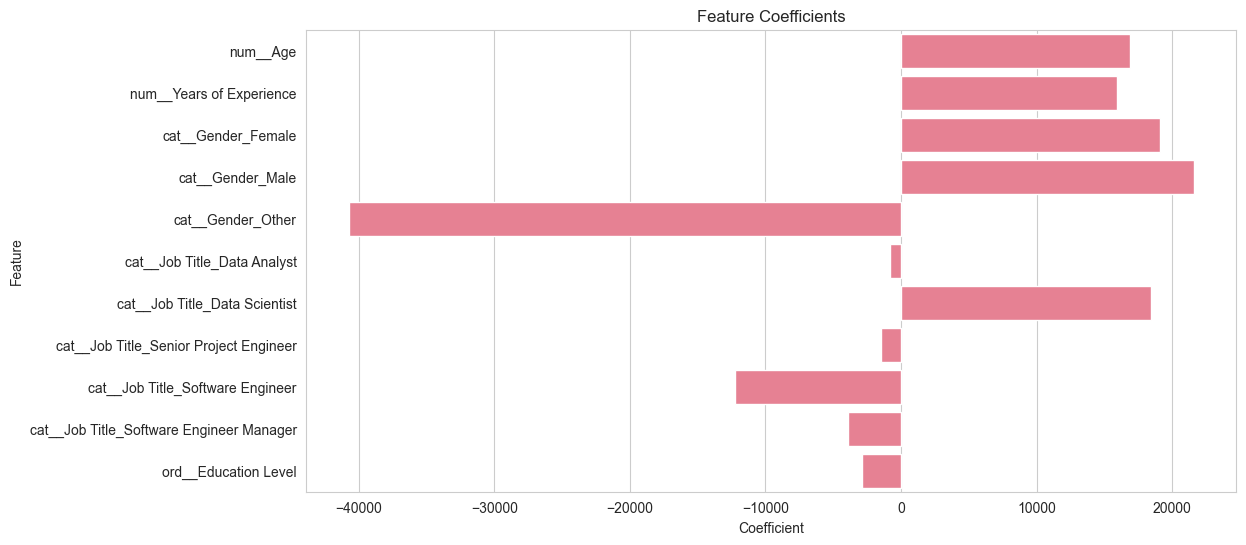

In [56]:
# Create a DataFrame for the coefficients
coef_df = pd.DataFrame({
    'Feature': cols,
    'Coefficient': coef
})

# Plot the coefficients
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Coefficients')
plt.show()

## **Wnioski**
1. Wiek i lata doświadczenia są proporcjonalne do zarobków.
2. W przypadku kobiet, zarobki są niższe niż u mężczyzn.
3. W przypadku płci "Other", zarobki są znacznie niższe, może być to spowodowane niską ilością takich próbek w zbiorze danych.
4. Najlepsze zarobiki są mają pracownicy na stanowisku "Data scientist", najgorsze na "Software Engineer".
5. O dziwo wiek jest negatywnie skorelowany z zarobkami.